In [24]:
# Importing modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")


In [25]:
dataset = pd.read_csv('/Users/ketanrode/Desktop/Projects/Credit Card Fraud Detection/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


<AxesSubplot:ylabel=' '>

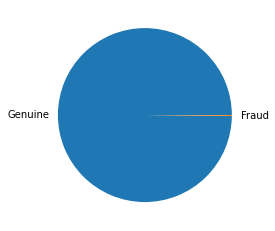

In [26]:
# check for relative proportion 
print("Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])))
print("Valid Transactions: " + str(len(dataset[dataset["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])/ dataset.shape[0]))

# To see how small are the number of Fraud transactions
data_p = dataset.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

# plot a pie chart
data_p[" "].value_counts().plot(kind="pie")

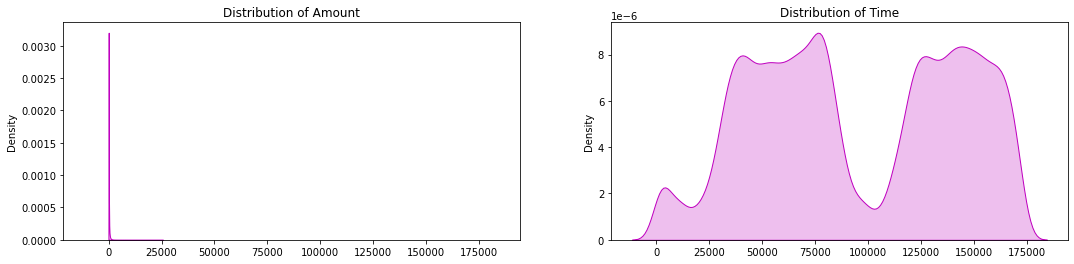

In [27]:
# plot the named features 
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_value = dataset['Amount'].values # values
time_value = dataset['Time'].values # values

sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Amount')
sns.distplot(time_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Time')

plt.show()

In [28]:
print("Average Amount in a Fraudulent Transaction: " + str(dataset[dataset["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(dataset[dataset["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 122.21132113821133
Average Amount in a Valid Transaction: 88.29102242225574


In [29]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(dataset["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


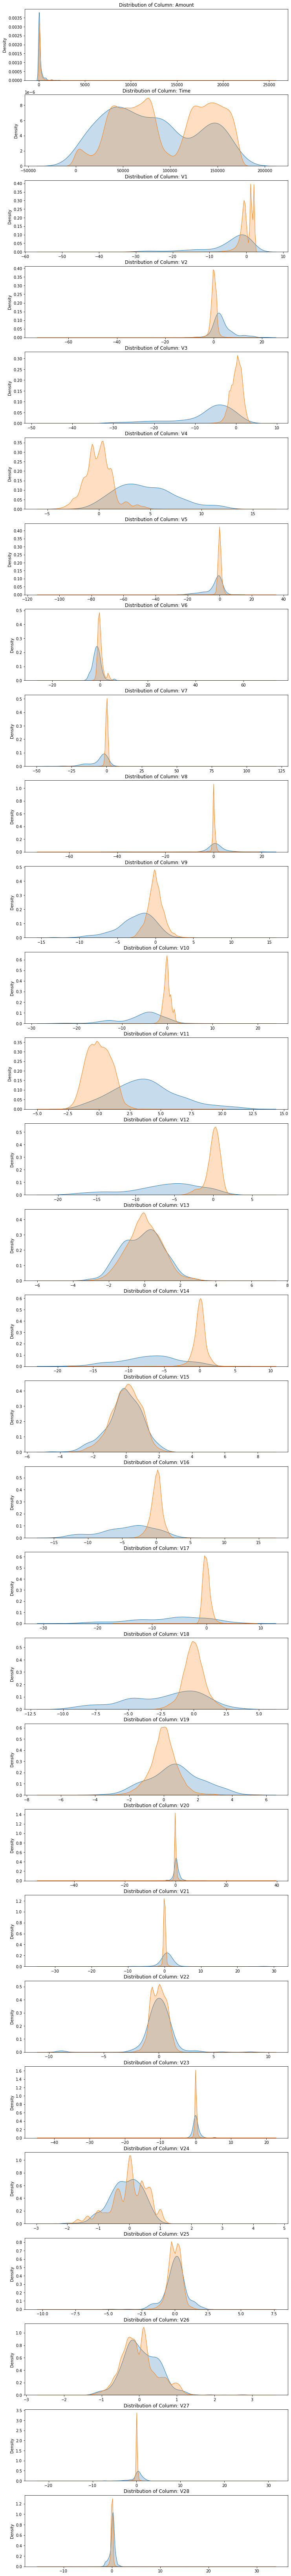

In [30]:
# Reorder the columns Amount, Time then the rest
data_plot = dataset.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show()

In [31]:
# check for null values
dataset.isnull().shape[0]
print("Non-missing values: " + str(dataset.isnull().shape[0]))
print("Missing values: " + str(dataset.shape[0] - dataset.isnull().shape[0]))

Non-missing values: 284807
Missing values: 0


In [32]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(dataset[["Time", "Amount"]])
dataset[["Time", "Amount"]] = scaler.transform(dataset[["Time", "Amount"]])

dataset.head().append(dataset.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


In [33]:
# Separate response and features  Undersampling before cross validation will lead to overfiting
y = dataset["Class"] # target 
X = dataset.iloc[:,0:30]

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [34]:
# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

In [35]:
# Import the imbalance Learn module
from imblearn.pipeline import make_pipeline ## Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  ## perform Under-sampling  based on NearMiss methods. 
from imblearn.over_sampling import SMOTE  ## PerformOver-sampling class that uses SMOTE. 
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Fit and predict
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)

# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  
print("The accuracy is", accuracy_score(y_test, y_pred)) 
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.9995611109160493
The precision is 0.974025974025974
The recall is 0.7653061224489796
The F1 score is 0.8571428571428571


In [37]:
def get_model_best_estimator_and_metrics(estimator, params, kf=kf, X_train=X_train, 
                                         y_train=y_train, X_test=X_test, 
                                         y_test=y_test, is_grid_search=True, 
                                         sampling=NearMiss(), scoring="f1", 
                                         n_jobs=2):
    if sampling is None:
        # make the pipeline of only the estimator, just so the remaining code will work fine
        pipeline = make_pipeline(estimator)
    else:
        # make the pipeline of over/undersampling and estimator
        pipeline = make_pipeline(sampling, estimator)
    # get the estimator name
    estimator_name = estimator.__class__.__name__.lower()
    # construct the parameters for grid/random search cv
    new_params = {f'{estimator_name}__{key}': params[key] for key in params}
    if is_grid_search:
        # grid search instead of randomized search
        search = GridSearchCV(pipeline, param_grid=new_params, cv=kf, return_train_score=True, n_jobs=n_jobs, verbose=0)
    else:
        # randomized search
        search = RandomizedSearchCV(pipeline, param_distributions=new_params, 
                                    cv=kf, scoring=scoring, return_train_score=True,
                                    n_jobs=n_jobs, verbose=0)
    # fit the model
    search.fit(X_train, y_train)
    cv_score = cross_val_score(search, X_train, y_train, scoring=scoring, cv=kf)
    # make predictions on the test data
    y_pred = search.best_estimator_.named_steps[estimator_name].predict(X_test)
    # calculate the metrics: recall, accuracy, F1 score, etc.
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_proba = search.best_estimator_.named_steps[estimator_name].predict_proba(X_test)[::, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    # return the best estimator along with the metrics
    return {
        "best_estimator": search.best_estimator_,
        "estimator_name": estimator_name,
        "cv_score": cv_score,
        "recall": recall,
        "accuracy": accuracy,
        "f1_score": f1,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc,
    }

In [38]:
# Cumulatively create a table for the ROC curve
## Create the dataframe
res_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc', 'recall', 'accuracy', 'f1_score'])

logreg_us_results = get_model_best_estimator_and_metrics(
    estimator=LogisticRegression(),
    params={"penalty": ['l1', 'l2'], 
                  'C': [ 0.01, 0.1, 1, 100], 
                  'solver' : ['liblinear']},
    sampling=NearMiss(),
)
print(f"==={logreg_us_results['estimator_name']}===")
print("Model:", logreg_us_results['best_estimator'])
print("Accuracy:", logreg_us_results['accuracy'])
print("Recall:", logreg_us_results['recall'])
print("F1 Score:", logreg_us_results['f1_score'])
res_table = res_table.append({'classifiers': logreg_us_results["estimator_name"],
                                        'fpr': logreg_us_results["fpr"], 
                                        'tpr': logreg_us_results["tpr"], 
                                        'auc': logreg_us_results["auc"],
                                        'recall': logreg_us_results["recall"],
                                        'accuracy': logreg_us_results["accuracy"],
                                        'f1_score': logreg_us_results["f1_score"],
                              }, ignore_index=True)

===logisticregression===
Model: Pipeline(steps=[('nearmiss', NearMiss()),
                ('logisticregression',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])
Accuracy: 0.8124363610828271
Recall: 0.9183673469387755
F1 Score: 0.016568483063328428


In [39]:
svm_us_results = get_model_best_estimator_and_metrics(
    estimator=SVC(probability=True),
    params={'gamma': [0.1, 0.01],  
                  'C': [ 0.01, 0.1], 
                  'kernel': ['rbf']},
    sampling=NearMiss(),
)
res_table = res_table.append({'classifiers': svm_us_results["estimator_name"],
                                        'fpr': svm_us_results["fpr"], 
                                        'tpr': svm_us_results["tpr"], 
                                        'auc': svm_us_results["auc"],
                                        'recall': svm_us_results["recall"],
                                        'accuracy': svm_us_results["accuracy"],
                                        'f1_score': svm_us_results["f1_score"],
                              }, ignore_index=True)

In [40]:
from sklearn import tree
dtc_us_results = get_model_best_estimator_and_metrics (
    estimator=tree.DecisionTreeClassifier(),
    params = {'max_depth':[3,5],
          'min_samples_leaf':[3,5],
          'min_samples_split':[8,10],
          'criterion':['gini','entropy']},
          
    sampling=NearMiss(),
)
res_table = res_table.append({'classifiers': dtc_us_results["estimator_name"],
                                        'fpr': dtc_us_results["fpr"], 
                                        'tpr': dtc_us_results["tpr"], 
                                        'auc': dtc_us_results["auc"],
                                        'recall': dtc_us_results["recall"],
                                        'accuracy': dtc_us_results["accuracy"],
                                        'f1_score': dtc_us_results["f1_score"],
                              }, ignore_index=True)

In [41]:
knn_us_results = get_model_best_estimator_and_metrics(
    estimator=KNeighborsClassifier(),
    params = {'n_neighbors': list(range(1, 15))},
    sampling=NearMiss(),
)
res_table = res_table.append({'classifiers': knn_us_results["estimator_name"],
                                        'fpr': knn_us_results["fpr"], 
                                        'tpr': knn_us_results["tpr"], 
                                        'auc': knn_us_results["auc"],
                                        'recall': knn_us_results["recall"],
                                        'accuracy': knn_us_results["accuracy"],
                                        'f1_score': knn_us_results["f1_score"],
                              }, ignore_index=True)

In [42]:
res_table

,classifiers,fpr,tpr,auc,recall,accuracy,f1_score
0,logisticregression,"[0.0, 7.034327518289252e-05, 0.000140686550365...","[0.0, 0.0, 0.0, 0.0, 0.01020408163265306, 0.01...",0.947891,0.918367,0.812436,0.016568
1,svc,"[0.0, 0.0, 0.0, 1.758581879572313e-05, 1.75858...","[0.0, 0.01020408163265306, 0.04081632653061224...",0.939438,0.877551,0.931235,0.042064
2,decisiontreeclassifier,"[0.0, 0.3471968204839617, 0.3471968204839617, ...","[0.0, 0.8469387755102041, 0.8979591836734694, ...",0.782528,0.948980,0.606369,0.008227
3,kneighborsclassifier,"[0.0, 0.013101435002813732, 0.0161437816544738...","[0.0, 0.7755102040816326, 0.8367346938775511, ...",0.937231,0.897959,0.944524,0.052758


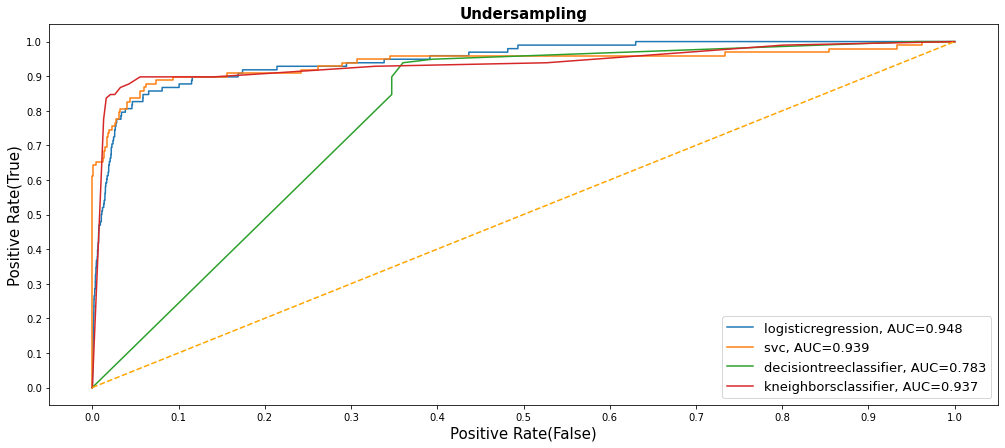

In [43]:
# Plot the ROC curve for undersampling
res_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for j in res_table.index:
    plt.plot(res_table.loc[j]['fpr'], 
             res_table.loc[j]['tpr'], 
             label="{}, AUC={:.3f}".format(j, res_table.loc[j]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Positive Rate(False)", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Positive Rate(True)", fontsize=15)
plt.title('Undersampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

In [44]:
# Cumulatively create a table for the ROC curve
res_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

lin_reg_os_results = get_model_best_estimator_and_metrics(
    estimator=LogisticRegression(),
    params={"penalty": ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 100, 100], 
            'solver' : ['liblinear']},
    sampling=SMOTE(random_state=42),
    scoring="f1",
    is_grid_search=False,
    n_jobs=2,
)
print(f"==={lin_reg_os_results['estimator_name']}===")
print("Model:", lin_reg_os_results['best_estimator'])
print("Accuracy:", lin_reg_os_results['accuracy'])
print("Recall:", lin_reg_os_results['recall'])
print("F1 Score:", lin_reg_os_results['f1_score'])
res_table = res_table.append({'classifiers': lin_reg_os_results["estimator_name"],
                                        'fpr': lin_reg_os_results["fpr"], 
                                        'tpr': lin_reg_os_results["tpr"], 
                                        'auc': lin_reg_os_results["auc"]
                              }, ignore_index=True)

===logisticregression===
Model: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])
Accuracy: 0.9759839893262174
Recall: 0.9183673469387755
F1 Score: 0.11627906976744186
